In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('/Users/alexvalles/Documents/Data Science/Curso Data Science Presencial/Sprint 5/housing data.csv',
                names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                        'B', 'LSTAT', 'MEDV'])

In [179]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [181]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [182]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

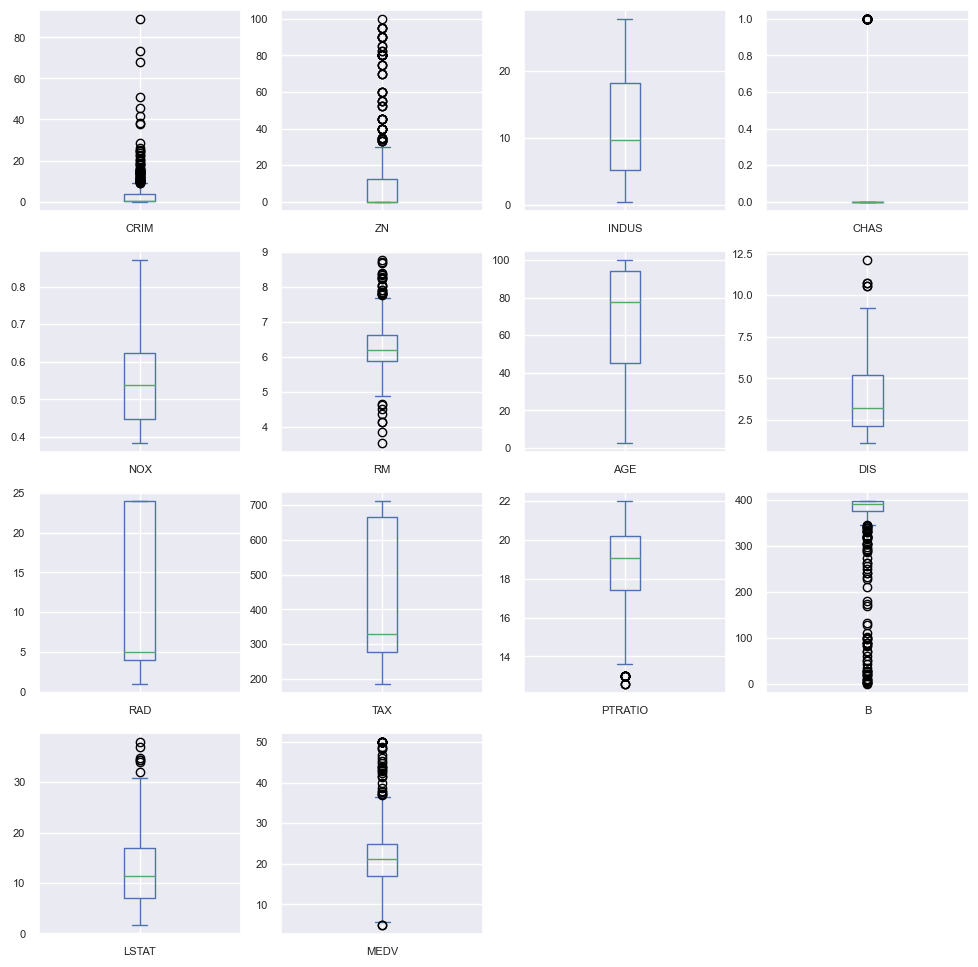

In [183]:
# Hacemos boxplot de las variables del dataset para comparar distribuciones y ver outliers.

df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

Podemos comprobar que la mayoría de variables del dataset tienen outliers, y esto debería ajustarse para una buena predicción de precios. 
En cualquier caso, para nuestro estudio, las variables que escogeremos más adelante serán: RM, LSTAT y PTRATIO.  Verenos que están moderadamente correlacionadas con la variable objetivo MEDV (que también tiene outliers que decidiremos eliminar más adelante)

### Exercici 1: Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

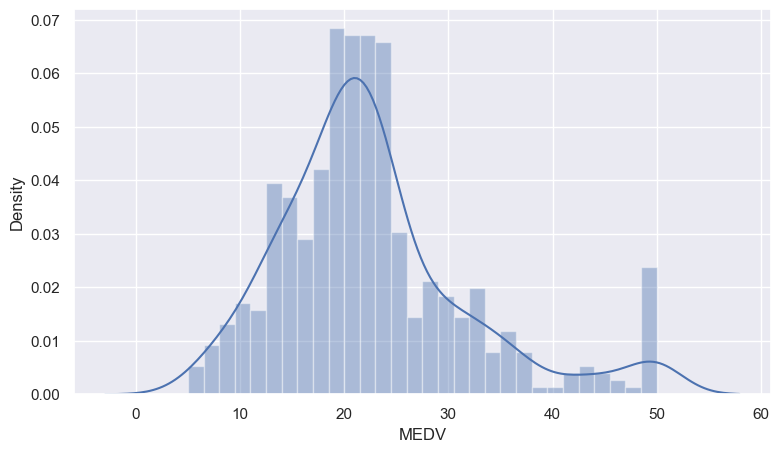

In [184]:
# vemos la distribución de MEDV

sns.distplot(df['MEDV'], bins=30)
plt.show()

Vemos que los valores de MEDV (valor medio viviendas en 1000$'s) se distribuyen con normalidad, pero existen esos outliers que optaremos a eliminar. Así los precios previstos se ajustarán más a la realidad.

In [185]:
import pandas as pd

df = df.copy()

# rango intercuartílico para MEDV
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1

# Definimos el rango aceptable 
rango_aceptable = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

# Filtramos datos dentro del rango aceptable para MEDV
df['MEDV'] = df['MEDV'].clip(lower=rango_aceptable[0], upper=rango_aceptable[1])

df['MEDV'].unique()

# los valores por encima de 36.925 y por debajo de 5.0625 han sido eliminados

array([24.    , 21.6   , 34.7   , 33.4   , 36.2   , 28.7   , 22.9   ,
       27.1   , 16.5   , 18.9   , 15.    , 21.7   , 20.4   , 18.2   ,
       19.9   , 23.1   , 17.5   , 20.2   , 13.6   , 19.6   , 15.2   ,
       14.5   , 15.6   , 13.9   , 16.6   , 14.8   , 18.4   , 21.    ,
       12.7   , 13.2   , 13.1   , 13.5   , 20.    , 24.7   , 30.8   ,
       34.9   , 26.6   , 25.3   , 21.2   , 19.3   , 14.4   , 19.4   ,
       19.7   , 20.5   , 25.    , 23.4   , 35.4   , 31.6   , 23.3   ,
       18.7   , 16.    , 22.2   , 33.    , 23.5   , 22.    , 17.4   ,
       20.9   , 24.2   , 22.8   , 24.1   , 21.4   , 20.8   , 20.3   ,
       28.    , 23.9   , 24.8   , 22.5   , 23.6   , 22.6   , 20.6   ,
       28.4   , 36.9625, 33.2   , 27.5   , 26.5   , 18.6   , 20.1   ,
       19.5   , 19.8   , 18.8   , 18.5   , 18.3   , 19.2   , 17.3   ,
       15.7   , 16.2   , 18.    , 14.3   , 23.    , 18.1   , 17.1   ,
       13.3   , 17.8   , 14.    , 13.4   , 11.8   , 13.8   , 14.6   ,
       15.4   , 21.5

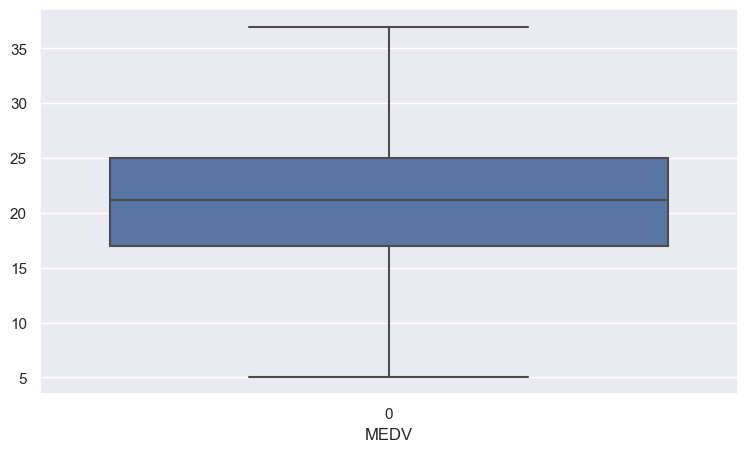

In [186]:
import seaborn as sns
sns.boxplot(df['MEDV'])
plt.xlabel('MEDV')
plt.show()

Como podemos ver en el boxplot, se han eliminado los outliers de la variable objetivo MEDV. Esperando así tener una predicción de precios lo más precisa posible.  

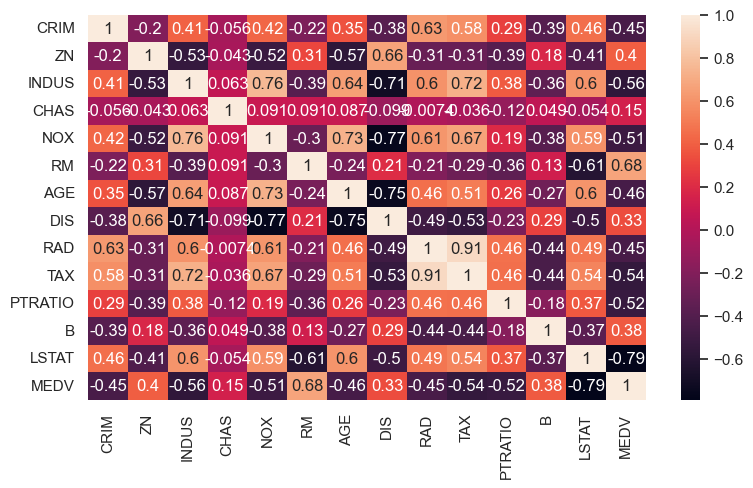

In [187]:
sns.heatmap(df.corr(),annot=True)
sns.set(rc={"figure.figsize": (12, 6)})

Al eliminar los outliers de MEDV, los valores de correlación con la variable MDEV han sufrido algunos cambios.
En la matriz de correlaciones, vemos que las variables que tienen mayor correlación con MEDV (valor medio) son LSTAT (clase social más baja) con correlación negativa de -0,79 (antes -0.74), seguido de RM (nº de habitaciones) con una correlación positiva de 0.68 (antes 0.7), y de PTRATIO (ratio profesor/alumno) con una correlación negativa de -0.52 (antes -0.51).

Las casas con más habitaciones (valor más alto de ‘RM’) implicarán más espacio y valdrán más, tomando el resto de factores como constantes. Son variables directamente proporcionales.

Las vecindades de clase social más baja (mayor valor de ‘LSTAT’) valdrán menos. Si el porcentaje de personas de la clase trabajadora más baja es más alto, es probable que tengan un poder adquisitivo bajo y, por lo tanto, las casas cuesten menos. Son variables inversamente proporcionales. En resumen, un área de viviendas de clase baja tendrá menos demanda y por ende los precios serán más bajos.

Los vecindarios con más proporción de estudiantes por maestro (mayor valor de ‘PTRATIO’) valdrán menos. Son variables inversamente proporcionales.
Este es el escenario de las escuelas públicas, en donde el ratio de estudiantes por maestro es mayor y por tanto hay menos dedicación para con los estudiantes, en comparación con los centros privados. Los precios de viviendas cerca de escuelas públicas son generalmente más bajos que para aquellas cerca de escuelas privadas.

### 1.1 ---> Regresión lineal simple: 

Realizaremos una regresión lineal con una sola variable independiente, para predecir el precio de las viviendas.
La variable que escogeremos para este caso será LSTAT que tiene la correlación más alta (la cual es negativa) con la variable dependiente MEDV (precio / valor medio de las viviendas en 1000 $'s) de -0.74.

<Axes: xlabel='LSTAT', ylabel='MEDV'>

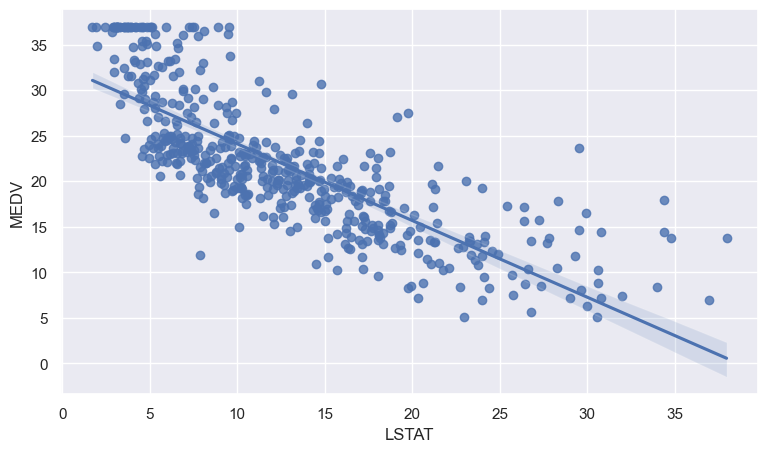

In [188]:
sns.set(rc={"figure.figsize": (9, 5)})
sns.regplot(y = df['MEDV'], x = df['LSTAT'])

En el gráfico anterior, comprobamos que LSTAT y MEDV están inversamente relacionadas. A medida que LSTAT aumenta, el precio disminuye, y viceversa. Ahora procederemos a realizar la regresión lineal de estas 2 variables:

In [189]:
X = df[['LSTAT']]
y = df['MEDV']

In [190]:
# Comprobamos si LSTAT es gausiano o no. Si no lo es, estandarizaremos con RobustScaler

from scipy.stats import shapiro

data = df['LSTAT']       
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente gaussiano')
else:
    print('Probablemente no gaussiano')


stat=0.937, p=0.000
Probablemente no gaussiano


In [191]:
from scipy.stats import shapiro

data = df['MEDV']       
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente gaussiano')
else:
    print('Probablemente no gaussiano')



stat=0.964, p=0.000
Probablemente no gaussiano


In [192]:
# Hacemos Robust scaler para LSTAT (la variable objetivo MEDV no la escalamos)
from sklearn.preprocessing import RobustScaler

scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X)

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [194]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 1) (102, 1)
(404,) (102,)


In [195]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [196]:
y_pred = model.predict(X_test)

In [197]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 17.203481939462197


In [198]:
from sklearn.metrics import mean_squared_error, r2_score
import math

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R2:", r2)

Coeficiente de determinación R2: 0.648369963940634


In [199]:
print("Intercepto del modelo:", model.intercept_)

Intercepto del modelo: 23.054831600353907


El precio de las viviendas previsto cuando el resto de variables son igual a 0, sería de 23.05 aprox.

In [200]:
coefficient = pd.DataFrame({'Variable': ['LSTAT'], 'Coefficient': model.coef_})
print(coefficient)

  Variable  Coefficient
0    LSTAT     -8.55382


Por cada aumento unitario en la variable 'LSTAT' (porcentaje de la población de bajos ingresos), se espera que el precio de la vivienda disminuya en aproximadamente 8.55 unidades.

In [201]:
#  precios reales y previstos
df_precios = pd.DataFrame({'Precio Real': y_test, 'Precio Previsto': y_pred})

# Imprimir el DataFrame
print(df_precios)

     Precio Real  Precio Previsto
173         23.6        25.038326
274         32.4        29.749125
491         13.6        17.318087
72          22.8        28.047766
452         16.1        18.002051
..           ...              ...
412         17.9         3.382329
436          9.6        17.335186
411         17.2        14.624980
86          22.5        21.772400
75          21.4        25.123821

[102 rows x 2 columns]


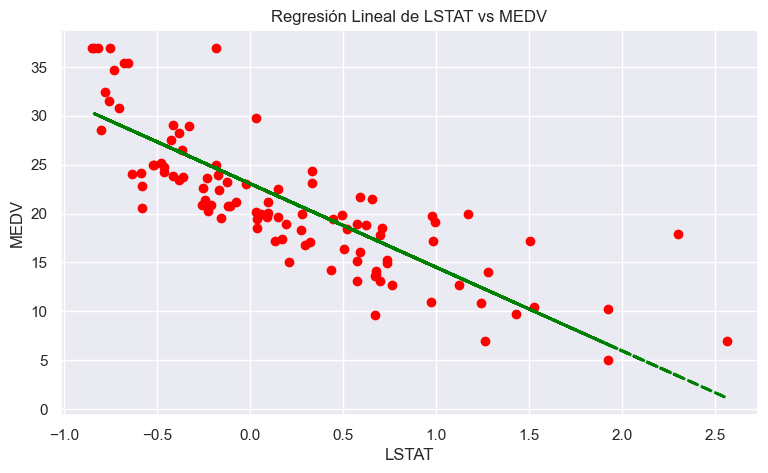

In [202]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='green', linestyle='--', linewidth=2)
plt.title('Regresión Lineal de LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

### 1.2 ---> Regresión lineal múltiple (con 3 variables)

En este caso, utilizaremos 3 variables para la predicción del precio: LSTAT, RM y PTRATIO.


<Axes: xlabel='RM', ylabel='MEDV'>

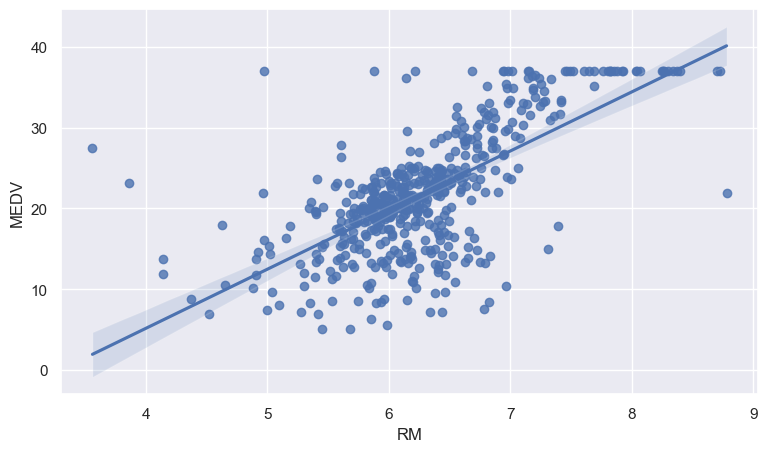

In [203]:
sns.set(rc={"figure.figsize": (9, 5)})
sns.regplot(y = df['MEDV'], x = df['RM'])

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

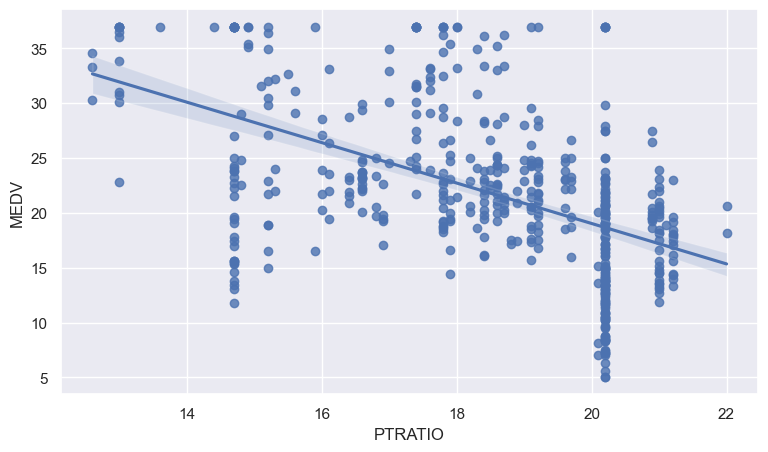

In [204]:
sns.set(rc={"figure.figsize": (9, 5)})
sns.regplot(y = df['MEDV'], x = df['PTRATIO'])

In [205]:
# Comprobamos si las variables son gaussianas o no, para ver si usamos RobustScaler
from scipy.stats import shapiro
data = df['RM']       
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente gaussiano')
else:
    print('Probablemente no gaussiano')

stat=0.961, p=0.000
Probablemente no gaussiano


In [206]:
data = df['PTRATIO']       
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente gaussiano')
else:
    print('Probablemente no gaussiano')

stat=0.904, p=0.000
Probablemente no gaussiano


In [207]:
X_mul = df[['LSTAT', 'RM', 'PTRATIO']]
y_mul = df['MEDV']

In [208]:
scaler = RobustScaler()
X_mul_scaled = scaler.fit_transform(X_mul)

In [209]:
from sklearn.model_selection import train_test_split
X_mul_train, X_mul_test, y_mul_train, y_mul_test = train_test_split(X_mul_scaled, y_mul, test_size=0.2, random_state=42)

In [210]:
model_1 = LinearRegression()

In [211]:
model_1.fit(X_mul_train, y_mul_train)

LinearRegression()

In [212]:
y_pred_mul = model_1.predict(X_mul_test)

In [213]:
mse = mean_squared_error(y_mul_test, y_pred_mul)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 14.915292009647803


In [214]:
r2 = r2_score(y_mul_test, y_pred_mul)
print("Coeficiente de determinación R2:", r2)

Coeficiente de determinación R2: 0.6951393511125233


In [215]:
print("Intercepto del modelo:", model_1.intercept_)

Intercepto del modelo: 21.834406721560295


Si el resto de variables fuesen igual a 0, el precio previsto de venta se situría en 21.834

In [216]:
coefficients_1 = pd.DataFrame({'Variable': ['LSTAT', 'RM', 'PTRATIO'], 'Coefficient': model_1.coef_})
print(coefficients_1)

  Variable  Coefficient
0    LSTAT    -5.729944
1       RM     2.347832
2  PTRATIO    -2.177649


La variable LSTAT (clase social más baja) es la que más peso tiene en la determinación del valor previsto. Para cada aumento unitario en la variable 'LSTAT', se espera que el precio de la vivienda disminuya en 5.73 unidades.

Para cada aumento unitario en la variable 'PTRATIO' (ratio de estudiantes por maestro), se espera que el precio de la vivienda disminuya en 2.18 unidades.

Para cada aumento unitario en la variable 'RM' (nº de habitaciones por vivienda), se espera que el precio de la vivienda aumente en 2.347 unidades.

In [217]:
#  precios reales y previstos
df_precios_mul = pd.DataFrame({'Precio Real': y_mul_test, 'Precio Previsto': y_pred_mul})

print(df_precios_mul)

     Precio Real  Precio Previsto
173         23.6        25.728661
274         32.4        29.194570
491         13.6        16.457524
72          22.8        24.605839
452         16.1        17.836859
..           ...              ...
412         17.9         2.733890
436          9.6        17.911888
411         17.2        16.719946
86          22.5        20.787507
75          21.4        23.739120

[102 rows x 2 columns]


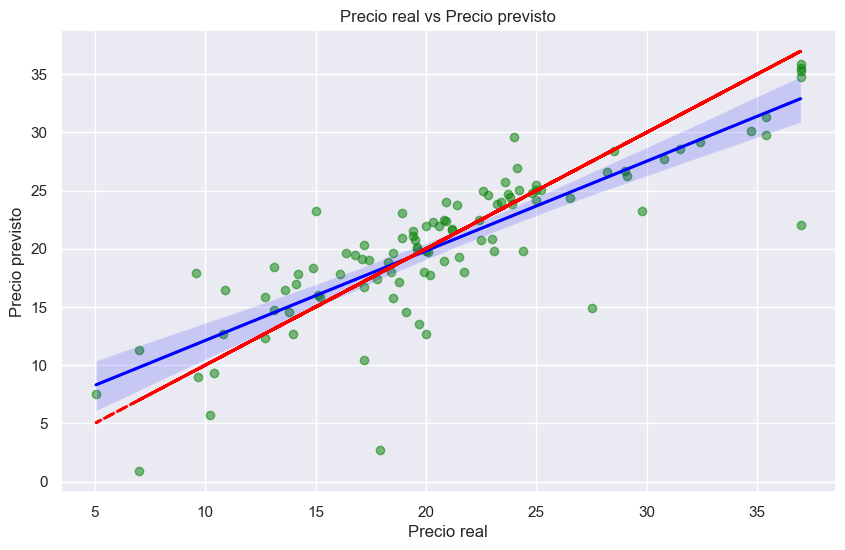

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

plt.figure(figsize=(10, 6))
sns.regplot(x=y_mul_test, y=y_pred_mul, scatter_kws={'color': 'green', 'alpha': 0.5}, line_kws={'color': 'blue'})
plt.plot(df_precios['Precio Real'], df_precios['Precio Real'], color='red', linestyle='--', linewidth=2)

plt.xlabel("Precio real")
plt.ylabel("Precio previsto")
plt.title("Precio real vs Precio previsto")

plt.show()


### Exercici 2: Compara’ls en base al MSE i al R2.

REGRESION LINEAL SIMPLE:
Error cuadrático medio: 17.203
Coeficiente de determinación R2: 0.648

REGRESION LINEAL MULTIPLE:
Error cuadrático medio: Error cuadrático medio: 14.915
Coeficiente de determinación R2: 0.695


Podemos observar que los resultados obtenidos son más fiables en la regresión lineal múltiple que en la simple. La predicción de precios es más ajustada en la regresión múltiple.

El hecho de introducir 2 variables independientes adicionales correlacionadas en el estudio, hace que el error cuadrático mejore en la regresión lineal múltiple. Se reduce de 17.203 a 14.915, y el coeficiente de determinación mejora pasando de 0.648 a 0.695

El 69.5% de la variabilidad en la variable dependiente puede explicarse por el modelo. Esto indica un ajuste moderado del modelo a los datos. Sin embargo, se podría mejorar, ya que un 30.5% de la variabilidad no se ha explicado.

El MSE de 14.915 en la regresión múltiple indica que, en promedio, los errores al cuadrado entre las predicciones de precios y los valores reales son de aproximadamente 14.915 unidades. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.

### Exercici 3: Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

### 3.1 ---> Regression tree para regresión múltiple (LSTAT, RM, PTRATIO)

In [219]:
# Decision tree para regresión múltiple
# Este tipo de regresión no necesita escalado de variables

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_dt = df[['LSTAT', 'RM', 'PTRATIO']]
y_dt = df['MEDV']

X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

DT_reg = DecisionTreeRegressor()


In [220]:
DT_reg

DecisionTreeRegressor()

In [221]:
DT_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [222]:
# probamos diversos parámetros

param_grid = {
    'max_depth': [3, 5, 7, 10, 14],
    'min_samples_split': [2, 5, 10, 12, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 0.7]
}

In [223]:
grid_search = GridSearchCV(DT_reg, param_grid, cv=14, scoring='neg_mean_squared_error')

# el modelo más preciso es con CV = 14

In [224]:
grid_search.fit(X_dt_train, y_dt_train)

GridSearchCV(cv=14, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 0.7],
                         'max_depth': [3, 5, 7, 10, 14],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 12, 15]},
             scoring='neg_mean_squared_error')

In [225]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'ccp_alpha': 0.0, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 12}


In [226]:
# Obtenemos el modelo con los mejores parámetros
best_regressor = DecisionTreeRegressor(**grid_search.best_params_)

# Entrenamos el modelo con el conjunto train
best_regressor.fit(X_dt_train, y_dt_train)

# Predecimos en el conjunto de test
y_pred_dt = best_regressor.predict(X_dt_test)

# Evaluamos el rendimiento en el conjunto de test
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_dt_test, y_pred_dt)
r2 = r2_score(y_dt_test, y_pred_dt)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 11.057688148980123
Coeficiente de Determinación (R^2): 0.7739867256964926


In [255]:
#  precios reales y previstos
df_precios_dt = pd.DataFrame({'Precio Real DT': y_dt_test, 'Precio Previsto DT': y_pred_dt})

print(df_precios_dt)

     Precio Real DT  Precio Previsto DT
173            23.6           23.312195
274            32.4           29.423864
491            13.6           15.437500
72             22.8           25.643269
452            16.1           15.437500
..              ...                 ...
412            17.9            9.337500
436             9.6           15.437500
411            17.2           11.334500
86             22.5           21.744643
75             21.4           23.312195

[102 rows x 2 columns]


Tenemos un mejor modelo de Regresión, un MSE de 11.058 y un R2 de 0.774

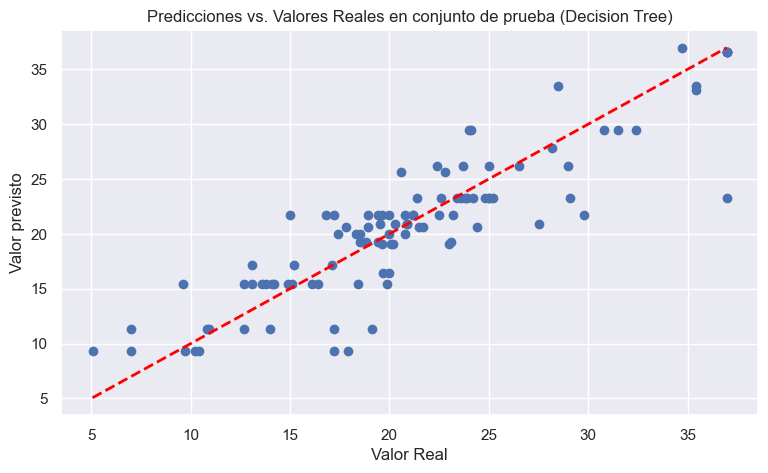

In [228]:
import matplotlib.pyplot as plt

plt.scatter(y_dt_test, y_pred_dt)
plt.xlabel("Valor Real")
plt.ylabel("Valor previsto")
plt.title("Predicciones vs. Valores Reales en conjunto de prueba (Decision Tree)")

plt.plot([min(y_dt_test), max(y_dt_test)], [min(y_dt_test), max(y_dt_test)], color='red', linestyle='--', linewidth=2)
plt.show()


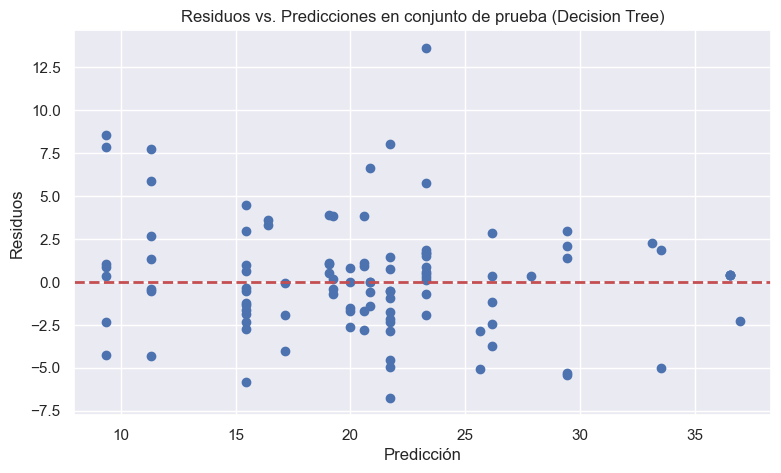

In [229]:
residuals = y_dt_test - y_pred_dt

plt.scatter(y_pred_dt, residuals)
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones en conjunto de prueba (Decision Tree)")
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Línea horizontal en y=0 para referencia
plt.show()


### 3.2 ---> Reg. Ridge Polinómica (LSTAT, RM, PTRATIO)

In [230]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

X_ridge = df[['RM', 'LSTAT', 'PTRATIO']]
y_ridge = df['MEDV']

X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

# Normalizamos con Robust Scaler
scaler = RobustScaler()
X_ridge_train_scaled = scaler.fit_transform(X_ridge_train)
X_ridge_test_scaled = scaler.transform(X_ridge_test)

# modelo de regresión polinómica con Ridge
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), Ridge())
polyreg.fit(X_ridge_train_scaled, y_ridge_train)

# Realizamos predicciones en el conjunto de prueba
y_ridge_pred_poly = polyreg.predict(X_ridge_test_scaled)

# Evaluamos el rendimiento del modelo polinómico
mse_poly = mean_squared_error(y_ridge_test, y_ridge_pred_poly)
print("Error cuadrático medio (MSE) en el conjunto de prueba (Ridge polinómico):", mse_poly)

r2 = r2_score(y_ridge_test, y_ridge_pred_poly)
print("R2 score Ridge Pol.:", r2)


Error cuadrático medio (MSE) en el conjunto de prueba (Ridge polinómico): 10.828776795170743
R2 score Ridge Pol.: 0.7786655522199625


In [231]:
# precios reales y previstos
df_precios_ridge = pd.DataFrame({'Precio Real Ridge': y_ridge_test, 'Precio Previsto Ridge': y_ridge_pred_poly})

print(df_precios_ridge)

     Precio Real Ridge  Precio Previsto Ridge
173               23.6              25.007670
274               32.4              30.472795
491               13.6              15.773931
72                22.8              25.605179
452               16.1              16.233787
..                 ...                    ...
412               17.9              11.371576
436                9.6              15.673490
411               17.2              13.293132
86                22.5              20.459759
75                21.4              23.792607

[102 rows x 2 columns]


In [232]:
params_polyreg = polyreg.get_params()
print("Parámetros modelo regresión polinómica con Ridge:")
print(params_polyreg)


Parámetros modelo regresión polinómica con Ridge:
{'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures()), ('ridge', Ridge())], 'verbose': False, 'polynomialfeatures': PolynomialFeatures(), 'ridge': Ridge(), 'polynomialfeatures__degree': 2, 'polynomialfeatures__include_bias': True, 'polynomialfeatures__interaction_only': False, 'polynomialfeatures__order': 'C', 'ridge__alpha': 1.0, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__positive': False, 'ridge__random_state': None, 'ridge__solver': 'auto', 'ridge__tol': 0.0001}


In [233]:
from sklearn.model_selection import GridSearchCV

# Definimos el rango de valores para los parámetros
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],
    'ridge__alpha': [0.1, 1.0, 10.0],
}

# configuramos búsqueda en cuadrícula
grid_search = GridSearchCV(polyreg, param_grid, cv=5, scoring='neg_mean_squared_error')

# búsqueda en cuadrícula en tus datos
grid_search.fit(X_ridge_train_scaled, y_ridge_train)

# mejor combinación de parámetros
best_params_polyreg = grid_search.best_params_
print("Mejores parámetros:", best_params_polyreg)

# Obtenemos el mejor modelo
best_polyreg = grid_search.best_estimator_


Mejores parámetros: {'polynomialfeatures__degree': 4, 'ridge__alpha': 10.0}


In [234]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_polyreg = best_polyreg.predict(X_ridge_test_scaled)


mse_polyreg = mean_squared_error(y_ridge_test, y_pred_polyreg)
print("MSE del mejor modelo:", mse_polyreg)

mae_polyreg = mean_absolute_error(y_ridge_test, y_pred_polyreg)
print("MAE del mejor modelo:", mae_polyreg)

r2_polyreg = r2_score(y_ridge_test, y_pred_polyreg)
print("R2 del mejor modelo:", r2_polyreg)


MSE del mejor modelo: 14.90201397184641
MAE del mejor modelo: 2.476290671509406
R2 del mejor modelo: 0.6954107471547508


El modelo de Ridge polinómico, no mejora el rendimiento del modelo REGRESSION TREE.

### Exercici 4: Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

### 4.1. Cross Validation Reg. Lineal Simple

In [235]:
# Evaluamos el rendimiento del modelo en cada fold

from sklearn.model_selection import cross_val_score

# cross validation (tras hacer pruebas, el valor óptimo es con cv=8)
cv_scores = cross_val_score(model, X_scaled, y, cv=8, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
r2_scores = cross_val_score(model, X_scaled, y, cv=8, scoring='r2')
r2_promedio = np.mean(r2_scores)

print("Resultados de la validación cruzada - Modelo lineal simple:")
print("RMSE para cada fold:", rmse_scores)
print("RMSE promedio:", np.mean(rmse_scores))
print("R2:",r2_scores)
print("R2 Promedio:", r2_promedio)


Resultados de la validación cruzada - Modelo lineal simple:
RMSE para cada fold: [4.06004316 3.39394514 5.08175318 5.2674666  5.84234211 5.44013449
 5.30964913 3.49256452]
RMSE promedio: 4.735987290187222
R2: [ 0.52195397  0.37874677  0.60312037  0.19961558  0.17701324  0.18482194
 -0.2599715   0.36386539]
R2 Promedio: 0.2711457198299623


In [236]:
# Realizamos predicciones con valoración cruzada

from sklearn.model_selection import cross_val_predict

cv_predictions = cross_val_predict(model, X_scaled, y, cv=8)

mse_cv = mean_squared_error(y, cv_predictions)

print("Predicciones de validación cruzada - Modelo lineal simple:")
print("MSE en validación cruzada:", mse_cv)

mae_cv = mean_absolute_error(y, cv_predictions)
print("MAE en validación cruzada:", mae_cv)

r2_cv = r2_score(y, cv_predictions)
print("R2 en validación cruzada:", r2_cv)


Predicciones de validación cruzada - Modelo lineal simple:
MSE en validación cruzada: 23.17505154597032
MAE en validación cruzada: 3.8232516393893863
R2 en validación cruzada: 0.598289991768079


Un MSE de 23.17 sugiere que, en promedio, los errores cuadráticos entre las predicciones y los valores reales son moderados.

El Error Absoluto Medio (MAE) mide el promedio de los errores absolutos entre las predicciones y los valores reales. Un valor de 4.64 indica que, en promedio, las predicciones difieren en alrededor de 4.64 unidades de la variable objetivo (MEDV)

Un R2 de 0.598 sugiere que aproximadamente el 56% de la variabilidad en la variable objetivo (MEDV) es explicada por el modelo, lo cual es un rendimiento moderado.


### 4.2. Cross Validation Reg. Lineal Múltiple

In [237]:
# Después de probar con diferentes valores de CV desde CV=5, el mejor modelo es con CV = 15

cv_scores = cross_val_score(model_1, X_mul_scaled, y, cv=15, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cv_scores)
r2_scores = cross_val_score(model_1, X_mul_scaled, y, cv=15, scoring='r2')
r2_promedio = np.mean(r2_scores)

print("Resultados de la valoración cruzada - Modelo lineal múltiple:")
print("RMSE para cada fold:", rmse_scores)
print("RMSE promedio:", np.mean(rmse_scores))
print("R2:",r2_scores)
print("R2 promedio:",r2_promedio)

Resultados de la valoración cruzada - Modelo lineal múltiple:
RMSE para cada fold: [3.09138182 2.92251614 2.43200968 2.31386233 4.16046271 4.80174804
 4.28574994 3.00122405 3.86295098 3.05489283 7.40505225 5.53771612
 5.92920427 3.10791338 3.13318088]
RMSE promedio: 3.935991028632361
R2: [ 0.73915566  0.69900214  0.68919736 -0.45634192  0.71041603  0.28157612
  0.43744302  0.79143011  0.50459559  0.1477853  -0.23393347 -1.40821318
 -0.37233878  0.08840163  0.6050431 ]
R2 promedio: 0.21488124708669715


Los resultados mejoran en la regresión lineal múltiple, con una reducción del RMSE promedio de 6.156 a 4.944 indicando que, en promedio, las predicciones del modelo se desvían en alrededor de 4.944 unidades de la variable objetivo (MEDV).


In [238]:
# Realizamos predicciones con validación cruzada
cv_predictions_1 = cross_val_predict(model_1, X_mul_scaled, y, cv=15)

# Calculamos el Mean Squared Error (MSE)
mse_cv_1 = mean_squared_error(y, cv_predictions_1)

# Calculamos el coeficiente de determinación (R2)
r2_cv_1 = r2_score(y, cv_predictions_1)

print("Predicciones de validación cruzada - Modelo lineal múltiple:")
print("Mean Squared Error (MSE) en validación cruzada:", mse_cv_1)
print("Coeficiente de Determinación (R^2) en validación cruzada:", r2_cv_1)

Predicciones de validación cruzada - Modelo lineal múltiple:
Mean Squared Error (MSE) en validación cruzada: 17.402229337504377
Coeficiente de Determinación (R^2) en validación cruzada: 0.6983545138376102


### 4.3. Cross Validation Degression Tree

In [239]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_regressor, X_dt_train, y_dt_train, cv=14, scoring='neg_mean_squared_error')
avg_mse_cv = -scores.mean()
rmse_scores = np.sqrt(-cv_scores)

print("Resultados de la validación cruzada - Degression Tree:")
print("RMSE para cada fold:", rmse_scores)
print("RMSE promedio:", np.mean(rmse_scores))
print("MSE Promedio de Validación Cruzada:", avg_mse_cv)


Resultados de la validación cruzada - Degression Tree:
RMSE para cada fold: [3.09138182 2.92251614 2.43200968 2.31386233 4.16046271 4.80174804
 4.28574994 3.00122405 3.86295098 3.05489283 7.40505225 5.53771612
 5.92920427 3.10791338 3.13318088]
RMSE promedio: 3.935991028632361
MSE Promedio de Validación Cruzada: 11.459918920639065


In [240]:
# Realizamos predicciones con validación cruzada
cv_predictions_2 = cross_val_predict(best_regressor, X_dt, y, cv=15)

# Calculamos el Mean Squared Error (MSE)
mse_cv_2 = mean_squared_error(y_dt, cv_predictions_2)

# Calcular el coeficiente de determinación (R2)
r2_cv_2 = r2_score(y, cv_predictions_2)

print("Predicciones validación cruzada - Degression Tree:")
print("MSE en validación cruzada:", mse_cv_2)
print("R2 en validación cruzada:", r2_cv_2)

Predicciones validación cruzada - Degression Tree:
MSE en validación cruzada: 14.73369335179419
R2 en validación cruzada: 0.7446101871275024


### 4.4. Cross Validation Reg. Ridge Polinómica

In [241]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_polyreg_cv = make_pipeline(PolynomialFeatures(best_params_polyreg['polynomialfeatures__degree']), Ridge(alpha=best_params_polyreg['ridge__alpha']))

# cross validation
cv_scores = cross_val_score(best_polyreg_cv, X_ridge_train_scaled, y_ridge_train, scoring='neg_mean_squared_error', cv=kf)

# Convertimos los scores negativos a positivos. Calculamos mse y rmse
cv_mse_mean = -cv_scores.mean()
cv_rmse_mean = np.sqrt(cv_mse_mean)

print("Resultados de la validación cruzada - Ridge Polinómico:")
print("MSE en validación cruzada (Ridge polinómico):", cv_mse_mean)
print("RMSE en validación cruzada (Ridge polinómico):", cv_rmse_mean)


Resultados de la validación cruzada - Ridge Polinómico:
MSE en validación cruzada (Ridge polinómico): 13.888840272098415
RMSE en validación cruzada (Ridge polinómico): 3.7267734398670407


El MSE en validación cruzada es ligeramente mayor que el MSE del mejor modelo Ridge, lo cual es esperado, ya que la validación cruzada proporciona una evaluación más conservadora del rendimiento del modelo.

In [242]:
# Realizar predicciones con validación cruzada
cv_predictions_3 = cross_val_predict(best_polyreg_cv, X_ridge, y_ridge, cv=15)

# Calculamos el Mean Squared Error (MSE)
mse_cv_3 = mean_squared_error(y_ridge, cv_predictions_3)

# Calculamos el coeficiente de determinación (R2)
r2_cv_3 = r2_score(y_ridge, cv_predictions_3)

print("Predicciones validación cruzada - Ridge Polinómico:")
print("Mean Squared Error (MSE) en validación cruzada:", mse_cv_3)
print("Coeficiente de Determinación (R^2) en validación cruzada:", r2_cv_3)

Predicciones validación cruzada - Ridge Polinómico:
Mean Squared Error (MSE) en validación cruzada: 19.58763462691645
Coeficiente de Determinación (R^2) en validación cruzada: 0.6604732959659521


Podemos constatar que, tras realizar las Cross Validations a los diferentes modelos de regresión, el mejor modelo es el Degression Tree, con un MSE en la predicción por valoración cruzada de 14.7336, y un R2 de 0.7447, explica una parte significativa de la variabilidad (el 74,47%) en la variable objetivo (MEDV), mejorando sensiblemente la predicción de precios. Se puede decir que el modelo tiene un buen ajuste a los datos.

### Exercici 5: No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.



In [243]:
# De nuestro modelo de regresión múltiple, eliminaremos la variable RM

X_mul_1 = df[['LSTAT',  'PTRATIO']]
y_mul_1 = df['MEDV']

In [244]:
scaler = RobustScaler()
X_mul_1_scaled = scaler.fit_transform(X_mul_1)

In [245]:
from sklearn.model_selection import train_test_split

X_mul_1_train, X_mul_1_test, y_mul_1_train, y_mul_1_test = train_test_split(X_mul_1_scaled, y_mul_1, test_size=0.3, random_state=42)
    

In [246]:
model_2 = LinearRegression()

In [247]:
model_2.fit(X_mul_1_train, y_mul_1_train)

LinearRegression()

In [248]:
y_pred_mul_1 = model_2.predict(X_mul_1_test)

In [249]:
mse = mean_squared_error(y_mul_1_test, y_pred_mul_1)
print("Error cuadrático medio (MSE):", mse)

r2 = r2_score(y_mul_1_test, y_pred_mul_1)
print("Coeficiente de determinación R2:", r2)

Error cuadrático medio (MSE): 18.32395326958884
Coeficiente de determinación R2: 0.641947206497337


In [250]:
print("Intercepto del modelo:", model_2.intercept_)

Intercepto del modelo: 22.432942950048517


El intercepto sería el valor previsto si las variables independientes (LSTAT y PTRATIO) fuesen igual a 0. En ese caso, el valor previsto de la vivenda sería de 22.43.


In [251]:
coefficients_2 = pd.DataFrame({'Variable': ['LSTAT',  'PTRATIO'], 'Coefficient': model_2.coef_})
print(coefficients_2)

  Variable  Coefficient
0    LSTAT    -7.678894
1  PTRATIO    -2.512306


Para cada aumento unitario en la variable 'LSTAT' (porcentaje de la población de bajos ingresos), se espera que el precio de la vivienda disminuya en aproximadamente 7.68 unidades. Lo que nos confirma que, pudiendo siempre depender de otros factores que lo alterasen, las viviendas en barrios de clase social son máa baratas.

Para cada aumento unitario en la variable 'PTRATIO' (ratio de estudiantes por maestro), se espera que el precio de la vivienda disminuya en aproximadamente 2.51 unidades. En zonas donde el ratio de alumnos por profesor sea más elevado, el precio de las viviendas de los alrededores será más bajo.

In [252]:
#  precios reales y previstos
df_precios_mul_1 = pd.DataFrame({'Precio Real': y_mul_1_test, 'Precio Previsto': y_pred_mul_1})

# Imprimir el DataFrame
print(df_precios_mul_1)

     Precio Real  Precio Previsto
173      23.6000        26.411824
274      32.4000        29.743527
491      13.6000        16.340866
72       22.8000        26.780588
452      16.1000        16.865145
..           ...              ...
441      17.1000        15.138257
23       14.5000        14.144154
225      36.9625        29.078722
433      14.3000        17.671026
447      12.6000        17.502175

[152 rows x 2 columns]


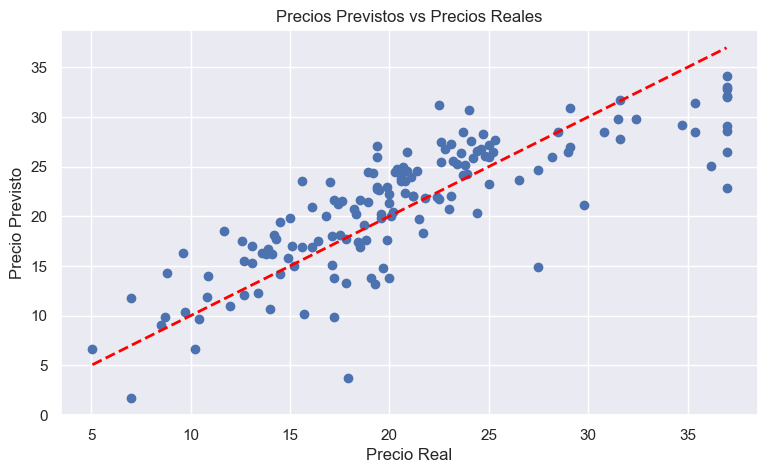

In [253]:
plt.scatter(df_precios_mul_1['Precio Real'], df_precios_mul_1['Precio Previsto'])
plt.plot([df_precios_mul_1['Precio Real'].min(), df_precios_mul_1['Precio Real'].max()],
         [df_precios_mul_1['Precio Real'].min(), df_precios_mul_1['Precio Real'].max()],
         linestyle='--', color='red', linewidth=2)


plt.title('Precios Previstos vs Precios Reales')
plt.xlabel('Precio Real')
plt.ylabel('Precio Previsto')
plt.show()

Era previsible que al eliminar 'RM' de la regresión lineal múltiple, tratándose de la segunda variable con mayor correlación con MEDV, la predicción de precios una vez eliminada la variable RM sea menos precisa. El mse aumenta hasta 18.3239 y el R2 se reduce a 0.6419.